<a href="https://colab.research.google.com/github/Bingyy/DeepLearning/blob/master/20190115_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

# get data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# setup model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 编译
model.compile(optimizer=tf.train.AdamOptimizer(), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])



# train model
model.fit(train_images, train_labels, epochs=5)

# evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 11.3406 - acc: 0.2955
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 10.5142 - acc: 0.3471
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 10.3769 - acc: 0.3559
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 10.3940 - acc: 0.3549
Epoch 5/5
10000/10000 [==============================] - 0s 31us/step
test accuracy: 0.4435


In [0]:
# 加载MNIST数据集 -- 《深度学习》第二章案例
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels.shape

(60000,)

In [0]:
# 将训练数据和标签关联在一起
from keras import models, layers

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # 直接输入展平的张量
net.add(layers.Dense(10,activation='softmax')) # 最后输出10个结果

In [0]:
# 编译网络
net.compile(optimizer='rmsprop',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [0]:
# 训练数据准备
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # 数据归一化

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 # 数据归一化

# 对标签进行分类编码：变成one-hot编码
from keras.utils import to_categorical

train_labels_final = to_categorical(train_labels)
test_labels_final = to_categorical(test_labels)

In [20]:
train_images.shape

(60000, 784)

In [21]:
train_labels[0]

5

In [22]:
train_labels_final.shape

(60000, 10)

In [25]:
# 拟合网络：训练开始
history = net.fit(train_images, train_labels_final, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0288 - acc: 0.9916
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0221 - acc: 0.9932
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0171 - acc: 0.9950
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0133 - acc: 0.9961
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0100 - acc: 0.9970


In [27]:
# 保存模型
import os
model_name = "keras_mnist_trained_model.h5"
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
  
model_path = os.path.join(save_dir, model_name)
net.save(model_path)
print("模型保存在：%s" % model_path)


模型保存在：/content/saved_models/keras_mnist_trained_model.h5


In [28]:
# 评估模型

test_loss, test_acc = net.evaluate(test_images, test_labels_final)

10000/10000 [==============================] - 1s 58us/step


In [29]:
print('test_loss: ', test_loss)

test_loss:  0.06558757138366236


In [30]:
print('test_acc: ', test_acc)

test_acc:  0.9831


In [44]:
# 使用模型进行测试数据集预测
# res = net.predict(test_images[0])
# test_images.shape # (10000, 784)
test_images[0].shape # (784,)
to_be_predicted = test_images[0].reshape((1,784)) # .reshape([1,784])
res = net.predict(to_be_predicted) # array([[2.7967730e-13, 4.2122917e-16, 6.3757026e-09, 1.7213833e-07,
        # 6.7121612e-19, 6.7293619e-12, 3.6417281e-21, 9.9999988e-01,
       #  7.6961736e-12, 5.2838995e-09]], dtype=float32)
res.argmax() # 下标从0开始

7

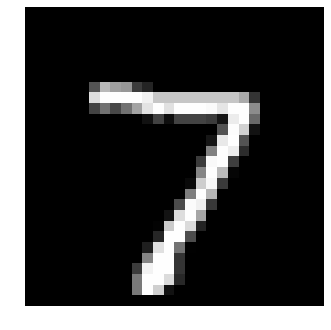

In [43]:
# 显示图片
import matplotlib.pyplot as plt
# plt.imshow(test_images[0].reshape((28,28,1)))

im = test_images[0].reshape(28, 28)
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.show()
# plt.savefig("test.png")  # 保存成文件
plt.close()

In [32]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
